In [60]:
import pandas as pd
import numpy as np

#read and parse the .csv features file for A1-turbine normalized data
df = pd.read_csv('Data/A2-bank/bank-additional_normalized.csv', delimiter = '\t')
df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,1,1,1,1,1,1,1,...,2,999,0,1,-0.3333,-0.4606,-0.6151,-0.6925,0.0246,0
1,39,2,2,2,1,2,1,2,1,1,...,4,999,0,1,0.8750,0.3975,0.2050,0.9138,0.7195,0
2,25,2,1,2,1,1,1,2,2,2,...,1,999,0,1,1.0000,0.7646,-0.2469,0.9624,1.0000,0
3,47,3,1,3,1,1,1,1,3,3,...,1,999,0,1,0.3750,-0.2214,-0.2636,0.6127,0.7558,0
4,32,2,2,3,1,2,1,1,4,4,...,3,999,2,2,-0.0417,0.5573,0.1130,-0.8871,-1.0000,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3090 non-null   int64  
 1   job             3090 non-null   int64  
 2   marital         3090 non-null   int64  
 3   education       3090 non-null   int64  
 4   default         3090 non-null   int64  
 5   housing         3090 non-null   int64  
 6   loan            3090 non-null   int64  
 7   contact         3090 non-null   int64  
 8   month           3090 non-null   int64  
 9   day_of_week     3090 non-null   int64  
 10  duration        3090 non-null   int64  
 11  campaign        3090 non-null   int64  
 12  pdays           3090 non-null   int64  
 13  previous        3090 non-null   int64  
 14  poutcome        3090 non-null   int64  
 15  emp.var.rate    3090 non-null   float64
 16  cons.price.idx  3090 non-null   float64
 17  cons.conf.idx   3090 non-null   f

In [62]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,...,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,39.184142,4.031068,1.533010,2.952104,1.000324,1.453722,1.164078,1.317799,3.749515,3.022977,...,2.509385,953.350809,0.208091,1.199353,0.397173,0.037587,-0.148023,0.291023,0.493690,0.119741
std,10.184002,2.481594,0.688699,1.290064,0.017990,0.497934,0.370406,0.465696,2.638469,1.396635,...,2.598168,208.030041,0.560141,0.492481,0.665110,0.456650,0.397195,0.802728,0.578315,0.324711
min,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,31.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,999.000000,0.000000,1.000000,-0.333300,-0.318800,-0.322200,-0.692500,0.024600,0.000000
50%,37.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,...,2.000000,999.000000,0.000000,1.000000,0.875000,-0.031200,-0.246900,0.914300,0.719500,0.000000
75%,46.000000,5.000000,2.000000,4.000000,1.000000,2.000000,1.000000,2.000000,6.000000,4.000000,...,3.000000,999.000000,0.000000,1.000000,1.000000,0.397500,0.205000,0.961900,1.000000,0.000000
max,88.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,2.000000,10.000000,5.000000,...,35.000000,999.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
columns = df.shape[1]

# construct an array for all features input values
inputcolumns = df.columns[0 : 20]
features = df[inputcolumns].values

# construct an array for all features target values
outputcolumn = df.columns[20]
targets = df[outputcolumn].values

print(features.shape)
print(targets.shape)

print(features)


(3090, 20)
(3090,)
[[ 3.000e+01  1.000e+00  1.000e+00 ... -6.151e-01 -6.925e-01  2.460e-02]
 [ 3.900e+01  2.000e+00  2.000e+00 ...  2.050e-01  9.138e-01  7.195e-01]
 [ 2.500e+01  2.000e+00  1.000e+00 ... -2.469e-01  9.624e-01  1.000e+00]
 ...
 [ 2.700e+01  1.100e+01  2.000e+00 ... -6.151e-01 -6.739e-01  2.460e-02]
 [ 5.800e+01  3.000e+00  1.000e+00 ...  2.301e-01  9.642e-01  1.000e+00]
 [ 3.400e+01  6.000e+00  2.000e+00 ... -2.636e-01  5.805e-01  7.558e-01]]


In [64]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.20, random_state= 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train)

(2472, 20)
(618, 20)
(2472,)
(618,)
[0 1 0 ... 0 0 0]


In [65]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(50, activation="sigmoid"),
    tf.keras.layers.Dense(25, activation="sigmoid"),
    tf.keras.layers.Dense(1),
])

sgd = tf.keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=sgd, loss = "mse", metrics=["mae"])
model.fit(x_train, y_train, epochs=100, verbose="2")



Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [66]:
print(x_train)
print(y_train)

[[48.      1.      1.     ...  0.2301  0.9642  1.    ]
 [33.      3.      2.     ...  0.2301  0.9628  1.    ]
 [50.      5.      1.     ... -0.2636  0.6127  0.7558]
 ...
 [34.      3.      2.     ...  0.2301  0.9633  1.    ]
 [40.      3.      2.     ... -0.2469  0.9619  1.    ]
 [42.      1.      1.     ...  0.205   0.9147  0.7195]]
[0 1 0 ... 0 0 0]


In [67]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print(y_pred_test)
print(y_pred_train)

# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# print("R2 score: ", r2_score(y_test, y_pred_test))
# print("MSE: ", mean_squared_error(y_test, y_pred_test))
# print("MAE: ", mean_absolute_error(y_test, y_pred_test))

# print("R2 score: ", r2_score(y_train, y_pred_train))
# print("MSE: ", mean_squared_error(y_train, y_pred_train))
# print("MAE: ", mean_absolute_error(y_train, y_pred_train))

78/78 [==============================] - 0s 2ms/step
[[0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.2548671 ]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.2548671 ]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.67558515]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.2548671 ]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840429]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.2548671 ]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840435]
 [0.03840419]
 [0.03840437]
 [0.03840437]
 [0.2548671 ]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.67607236]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.2548671 ]
 [0.67594516]
 [0.03840437]
 [0.03840437]
 [0.2548671 ]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840437]
 [0.03840

In [73]:
# binarize y_pred_test
y_pred_test_binarized = (y_pred_test > 0.5).astype(np.int_)
# print(y_pred_test_binarized)
# print(y_pred_test)



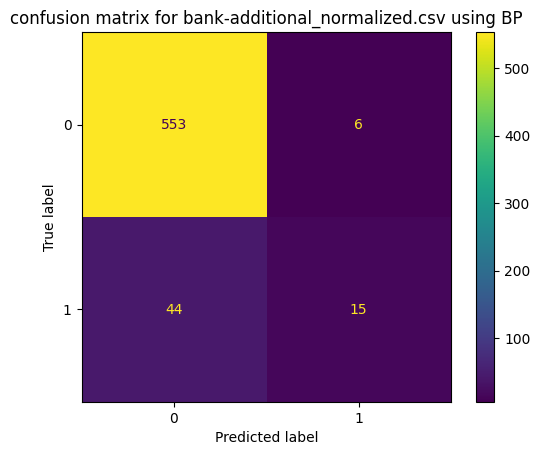

In [75]:
import matplotlib.pyplot as plt
from sklearn import metrics

actual = y_test
predicted = y_pred_test_binarized

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.title("confusion matrix for bank-additional_normalized.csv using BP")
plt.show()